In [54]:
# Import necessary packages
import librosa
import librosa.display as ld
import matplotlib.pyplot as plt
import numpy as np
from soundfile import write
import math

In [159]:
song, sr = librosa.load('../../Songs/Various Artists/The Twilight Saga_ New Moon (Deluxe Version) [Original Motion Picture Soundtrack]/08 Rosyln.m4a')
start = np.random.choice(song.shape[0])

write(file = f'snippets/Roslyn.wav', data=song[start:start+60*sr], samplerate=sr)

/home/joe/.local/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


In [160]:
sg, sr = librosa.load('snippets/Bones.wav')
sg10k, _ = librosa.load('snippets/Bones.wav', sr=10000)
sg1k, _ = librosa.load('snippets/Bones.wav', sr=1000)
sg100, _ = librosa.load('snippets/Bones.wav', sr=100)

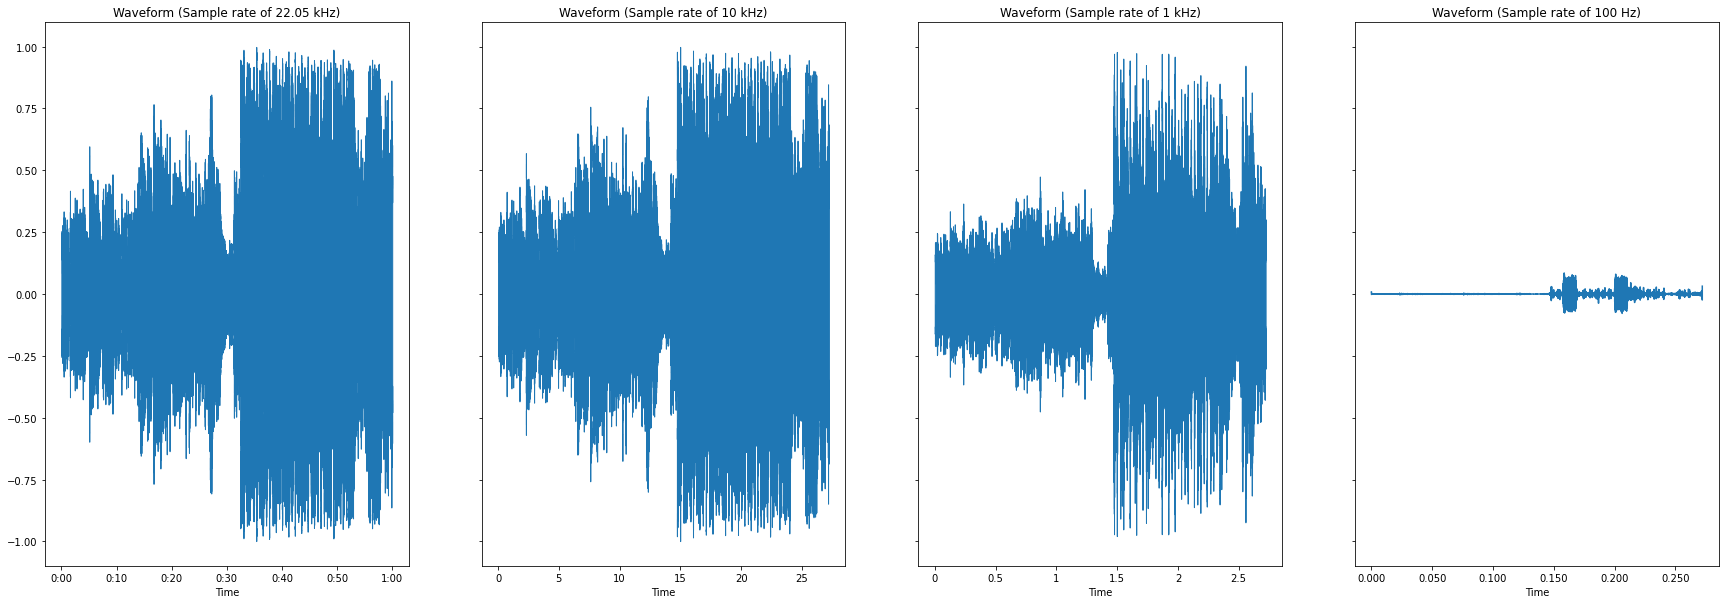

In [161]:
#Visualizing waveforms
fig, ax = plt.subplots(1,4, figsize = (30,10), sharey = True)
ld.waveshow(sg, sr=sr, ax=ax[0])
ax[0].set(title = 'Waveform (Sample rate of 22.05 kHz)')
ld.waveshow(sg10k, sr=sr, ax=ax[1])
ax[1].set(title = 'Waveform (Sample rate of 10 kHz)')
ld.waveshow(sg1k, sr=sr, ax=ax[2])
ax[2].set(title = 'Waveform (Sample rate of 1 kHz)')
ld.waveshow(sg100, sr=sr, ax=ax[3])
ax[3].set(title = 'Waveform (Sample rate of 100 Hz)')
plt.show()

In [162]:
bones, sr = librosa.load('snippets/Bones.wav')
daydream, _ = librosa.load('snippets/Daydream.wav')
noddingoff, _ = librosa.load('snippets/NoddingOff.wav')
roslyn, _ = librosa.load('snippets/Roslyn.wav')
takefive, _ = librosa.load('snippets/TakeFive.wav')

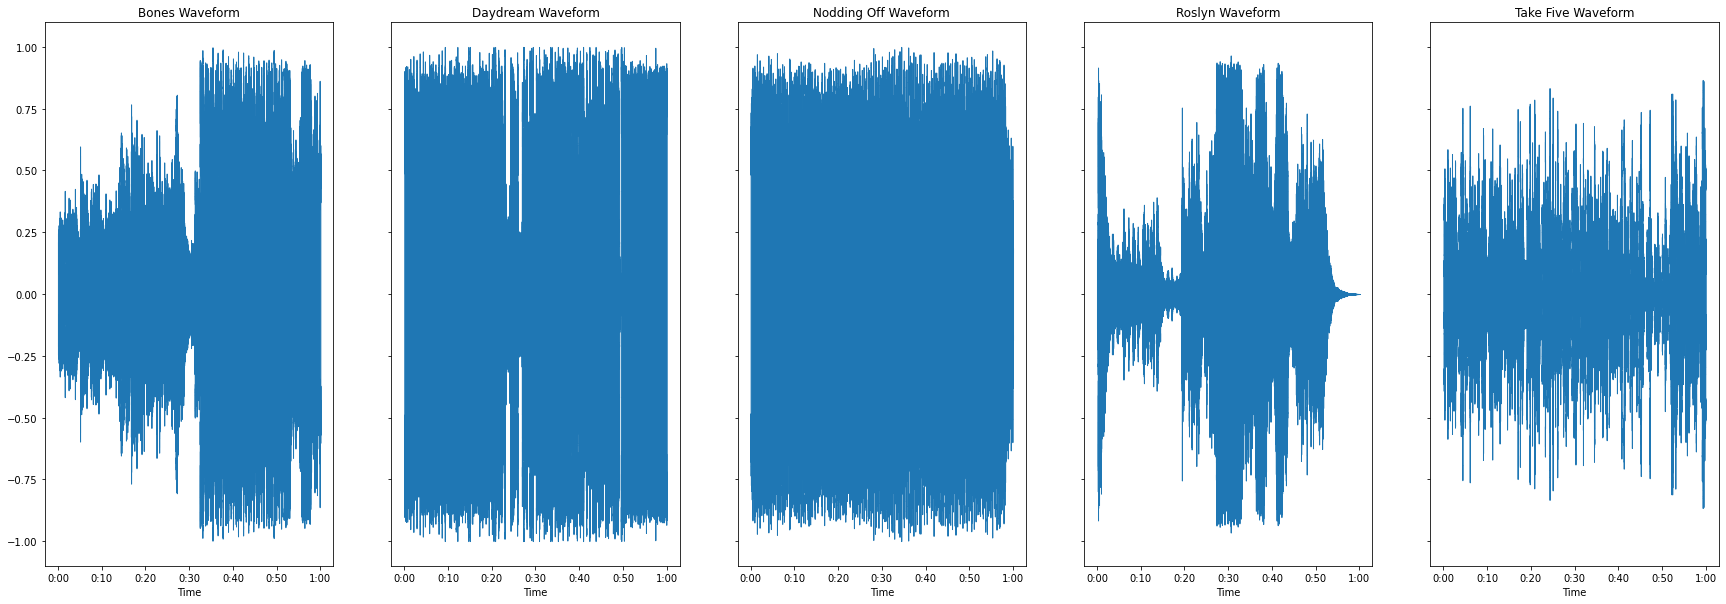

In [163]:
#Visualizing waveforms
fig, ax = plt.subplots(1,5, figsize = (30,10), sharey = True)
ld.waveshow(bones, sr=sr, ax=ax[0])
ax[0].set(title = 'Bones Waveform')
ld.waveshow(daydream, sr=sr, ax=ax[1])
ax[1].set(title = 'Daydream Waveform')
ld.waveshow(noddingoff, sr=sr, ax=ax[2])
ax[2].set(title = 'Nodding Off Waveform')
ld.waveshow(roslyn, sr=sr, ax=ax[3])
ax[3].set(title = 'Roslyn Waveform')
ld.waveshow(takefive, sr=sr, ax=ax[4])
ax[4].set(title = 'Take Five Waveform')
plt.show()

In [164]:
def AE(signal, frame_size):
    '''
    Create the Amplitude Envelope of a given signal.
    
    Parameters:
    ------------
    
    - signal (numpy array):
        The signal/sound in question to be analyzed. 
    - frame_size (int):
        Number of samples within each frame. Formally defined as K.
    
    Returns:
    ---------
    Array of amplitude envelope
    '''
    AE = []
    # Calculate number of frames
    num_frames = math.floor(signal.shape[0] / frame_size)
    for t in range(num_frames):
        # Calculate bounds of each frame
        # By doing this, our hop length is the same as the frame length
        # Therefore, these frames are NOT overlapping.
        lower = t*frame_size
        upper = (t+1)*(frame_size) -1
        # Find maximum of each frame and add it to our array
        AE.append(np.max(signal[lower:upper]))
    return np.array(AE)

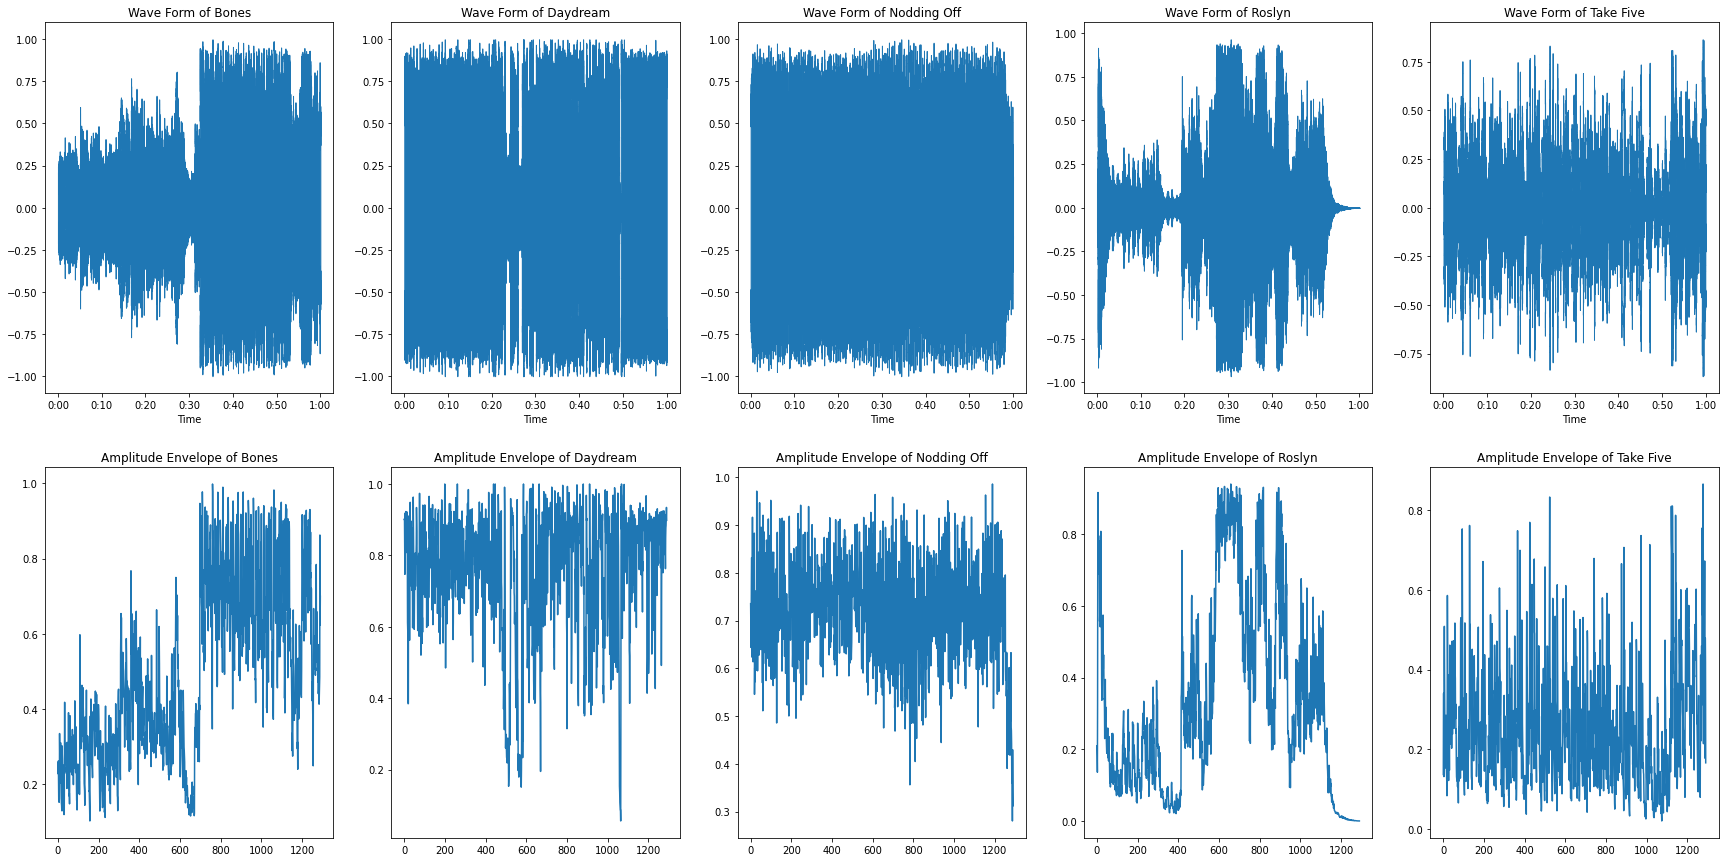

In [165]:
fig, ax = plt.subplots(2,5, figsize=(30,15))

ax[0,0].set(title='Wave Form of Bones')
ld.waveshow(bones, sr=sr, ax=ax[0,0])
ax[1,0].set(title = 'Amplitude Envelope of Bones')
ax[1,0].plot(AE(bones, 1024))

ax[0,1].set(title='Wave Form of Daydream')
ld.waveshow(daydream, sr=sr, ax=ax[0,1])
ax[1,1].set(title = 'Amplitude Envelope of Daydream')
ax[1,1].plot(AE(daydream, 1024))

ax[0,2].set(title='Wave Form of Nodding Off')
ld.waveshow(noddingoff, sr=sr, ax=ax[0,2])
ax[1,2].set(title = 'Amplitude Envelope of Nodding Off')
ax[1,2].plot(AE(noddingoff, 1024))

ax[0,3].set(title='Wave Form of Roslyn')
ld.waveshow(roslyn, sr=sr, ax=ax[0,3])
ax[1,3].set(title = 'Amplitude Envelope of Roslyn')
ax[1,3].plot(AE(roslyn, 1024))

ax[0,4].set(title='Wave Form of Take Five')
ld.waveshow(takefive, sr=sr, ax=ax[0,4])
ax[1,4].set(title = 'Amplitude Envelope of Take Five')
ax[1,4].plot(AE(takefive, 1024))

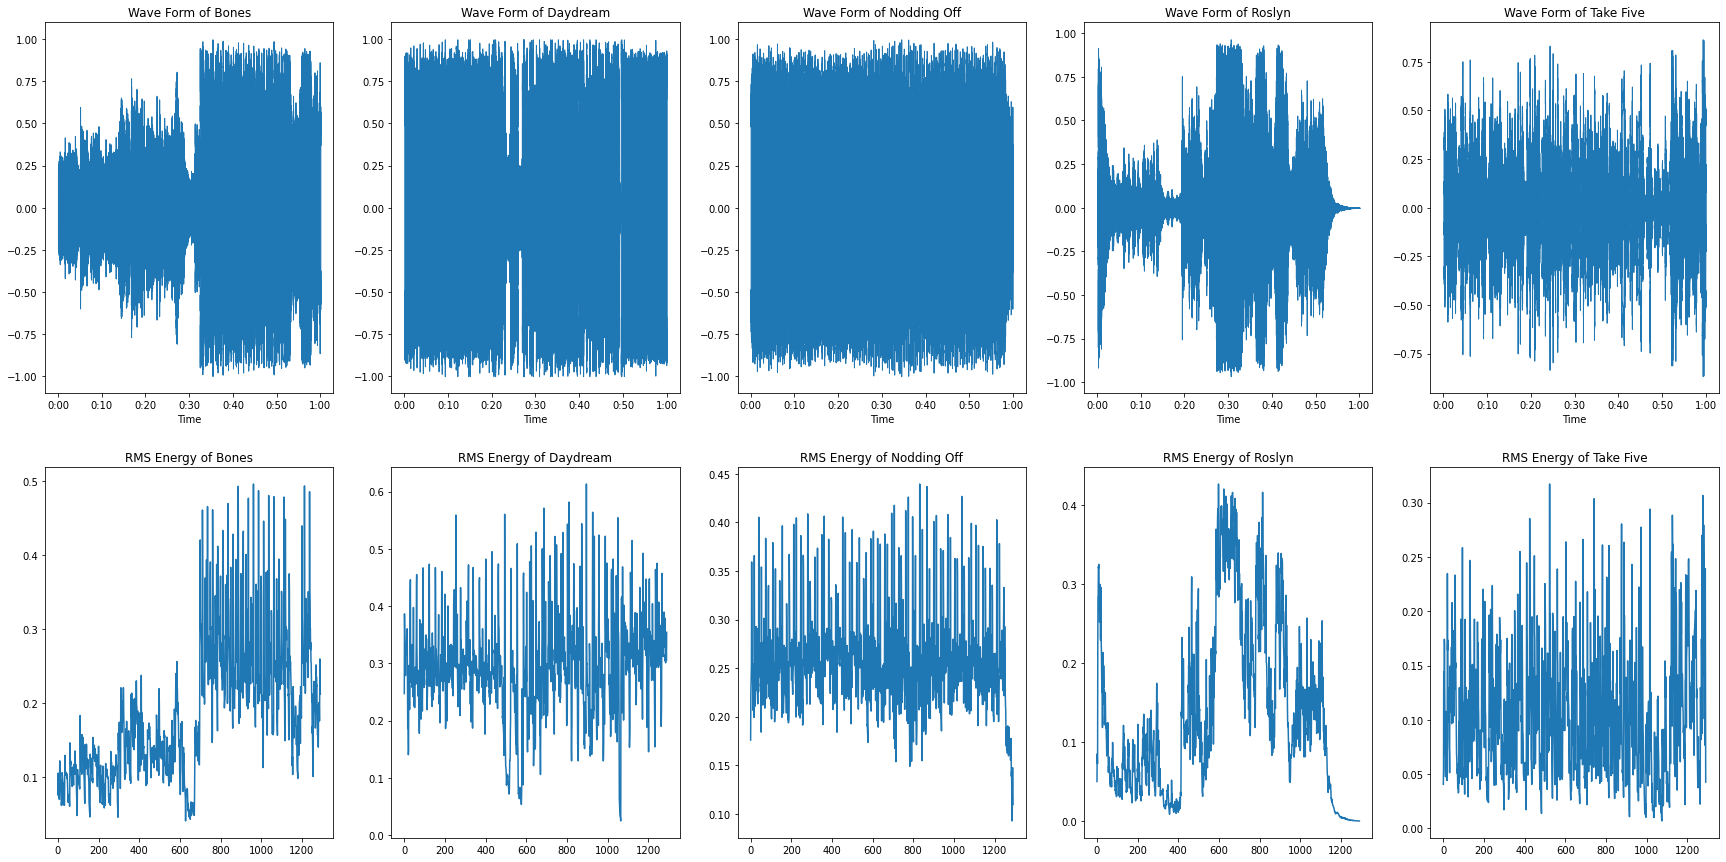

In [166]:
RMSbones = librosa.feature.rms(y=bones, frame_length=1024, hop_length=1024)
RMSdaydream = librosa.feature.rms(y=daydream, frame_length=1024, hop_length=1024)
RMSnoddingoff = librosa.feature.rms(y=noddingoff, frame_length=1024, hop_length=1024)
RMSroslyn = librosa.feature.rms(y=roslyn, frame_length=1024, hop_length=1024)
RMStakefive = librosa.feature.rms(y=takefive, frame_length=1024, hop_length=1024)

fig, ax = plt.subplots(2,5, figsize=(30,15))

ax[0,0].set(title='Wave Form of Bones')
ld.waveshow(bones, sr=sr, ax=ax[0,0])
ax[1,0].set(title = 'RMS Energy of Bones')
ax[1,0].plot(RMSbones.T) # Returned shape is (1,t) so we take the transpose.

ax[0,1].set(title='Wave Form of Daydream')
ld.waveshow(daydream, sr=sr, ax=ax[0,1])
ax[1,1].set(title = 'RMS Energy of Daydream')
ax[1,1].plot(RMSdaydream.T)

ax[0,2].set(title='Wave Form of Nodding Off')
ld.waveshow(noddingoff, sr=sr, ax=ax[0,2])
ax[1,2].set(title = 'RMS Energy of Nodding Off')
ax[1,2].plot(RMSnoddingoff.T)

ax[0,3].set(title='Wave Form of Roslyn')
ld.waveshow(roslyn, sr=sr, ax=ax[0,3])
ax[1,3].set(title = 'RMS Energy of Roslyn')
ax[1,3].plot(RMSroslyn.T)

ax[0,4].set(title='Wave Form of Take Five')
ld.waveshow(takefive, sr=sr, ax=ax[0,4])
ax[1,4].set(title = 'RMS Energy of Take Five')
ax[1,4].plot(RMStakefive.T)
plt.show()


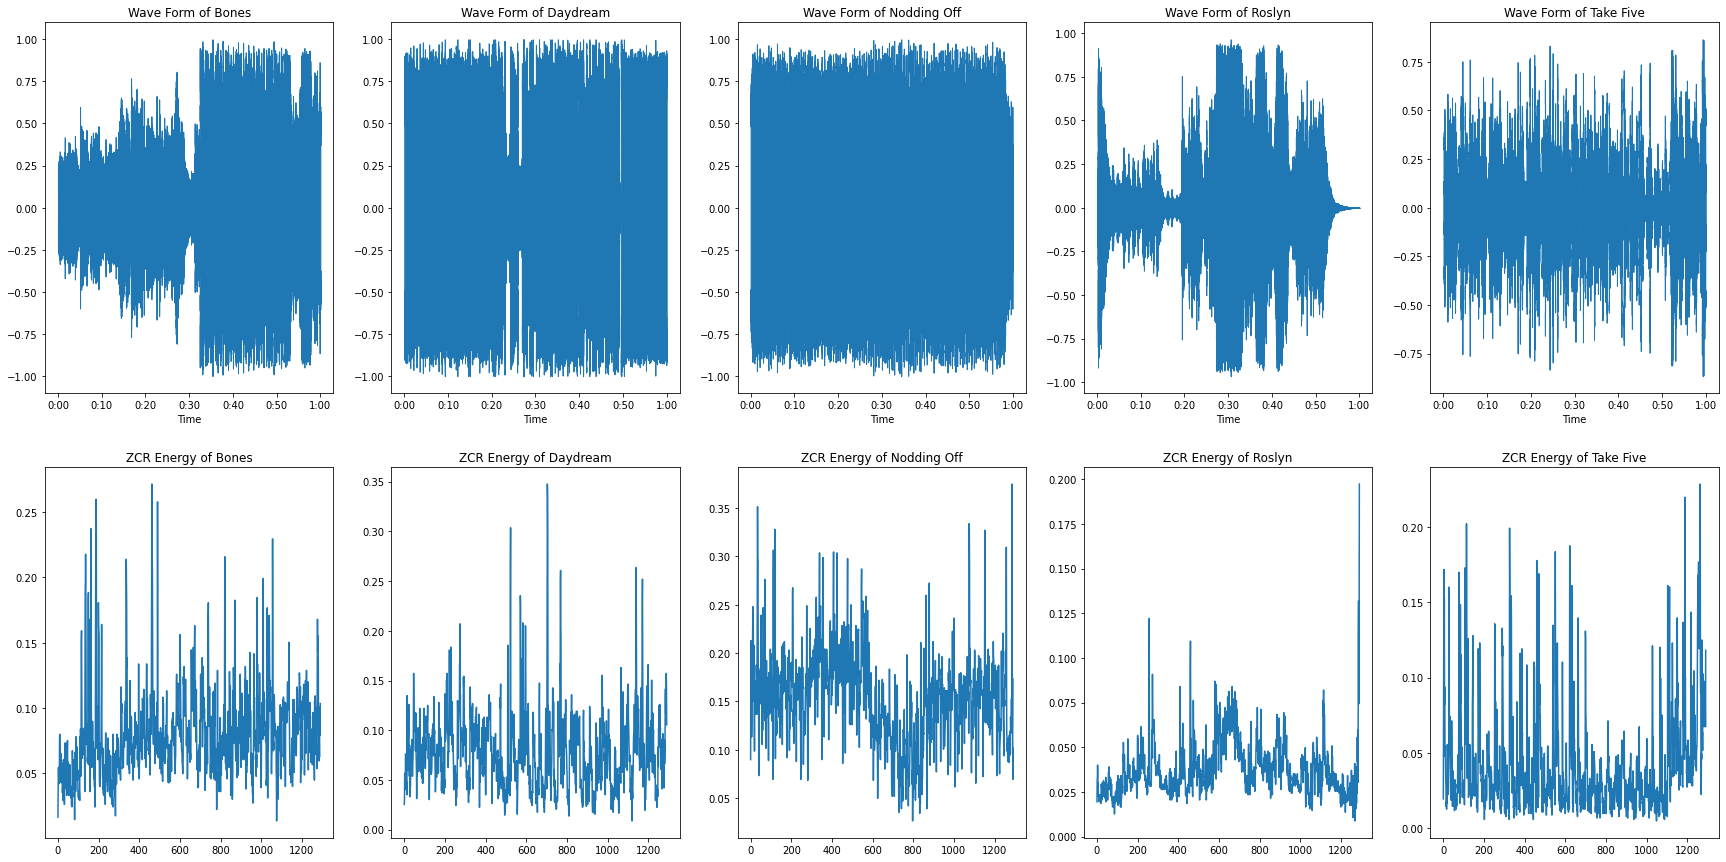

In [167]:
ZCRbones = librosa.feature.zero_crossing_rate(y = bones, frame_length=1024, hop_length=1024)
ZCRdaydream = librosa.feature.zero_crossing_rate(y = daydream, frame_length=1024, hop_length=1024)
ZCRnoddingoff = librosa.feature.zero_crossing_rate(y = noddingoff, frame_length=1024, hop_length=1024)
ZCRroslyn = librosa.feature.zero_crossing_rate(y = roslyn, frame_length=1024, hop_length=1024)
ZCRtakefive = librosa.feature.zero_crossing_rate(y = takefive, frame_length=1024, hop_length=1024)

fig, ax = plt.subplots(2,5, figsize=(30,15))

ax[0,0].set(title='Wave Form of Bones')
ld.waveshow(bones, sr=sr, ax=ax[0,0])
ax[1,0].set(title = 'ZCR Energy of Bones')
ax[1,0].plot(ZCRbones.T)

ax[0,1].set(title='Wave Form of Daydream')
ld.waveshow(daydream, sr=sr, ax=ax[0,1])
ax[1,1].set(title = 'ZCR Energy of Daydream')
ax[1,1].plot(ZCRdaydream.T)

ax[0,2].set(title='Wave Form of Nodding Off')
ld.waveshow(noddingoff, sr=sr, ax=ax[0,2])
ax[1,2].set(title = 'ZCR Energy of Nodding Off')
ax[1,2].plot(ZCRnoddingoff.T)

ax[0,3].set(title='Wave Form of Roslyn')
ld.waveshow(roslyn, sr=sr, ax=ax[0,3])
ax[1,3].set(title = 'ZCR Energy of Roslyn')
ax[1,3].plot(ZCRroslyn.T)

ax[0,4].set(title='Wave Form of Take Five')
ld.waveshow(takefive, sr=sr, ax=ax[0,4])
ax[1,4].set(title = 'ZCR Energy of Take Five')
ax[1,4].plot(ZCRtakefive.T)
plt.show()

In [168]:
def fft_components(sound):
    # Find FFT
    fft = np.fft.fft(sound)
    # Find magnitude
    mag = np.abs(np.real(fft))
    # Find frequency
    freq = np.linspace(0,sr, len(mag))
    return mag, freq


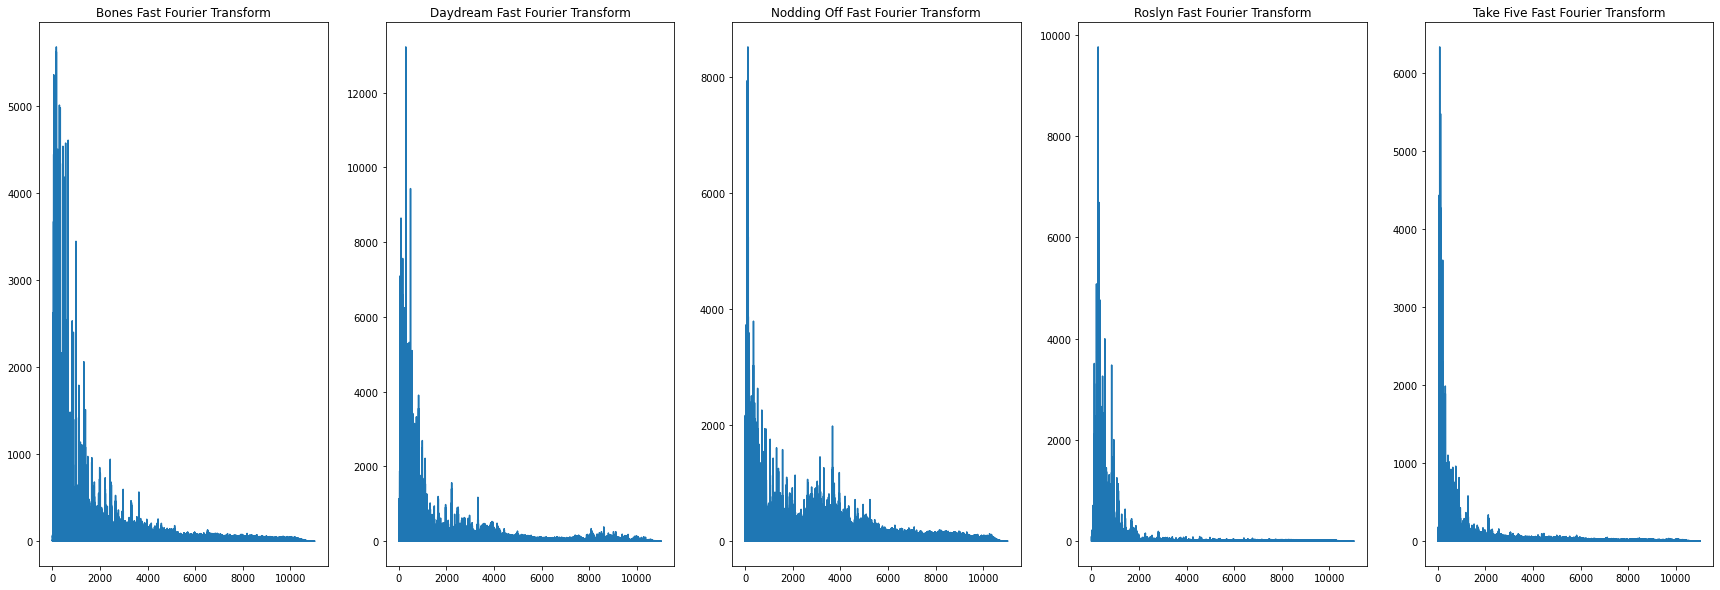

In [169]:
bones_mag, bones_freq = fft_components(bones)
daydream_mag, daydream_freq = fft_components(daydream)
noddingoff_mag, noddingoff_freq = fft_components(noddingoff)
roslyn_mag, roslyn_freq = fft_components(roslyn)
takefive_mag, takefive_freq = fft_components(takefive)

fig, ax = plt.subplots(1,5, figsize = (30,10))

ax[0].plot(bones_freq[:int(len(bones_mag) / 2)], bones_mag[:int(len(bones_mag) / 2)])
ax[0].set(title = 'Bones Fast Fourier Transform')

ax[1].plot(daydream_freq[:int(len(daydream_mag) / 2)], daydream_mag[:int(len(daydream_mag) / 2)])
ax[1].set(title = 'Daydream Fast Fourier Transform')

ax[2].plot(noddingoff_freq[:int(len(noddingoff_mag) / 2)], noddingoff_mag[:int(len(noddingoff_mag) / 2)])
ax[2].set(title = 'Nodding Off Fast Fourier Transform')

ax[3].plot(roslyn_freq[:int(len(roslyn_mag) / 2)], roslyn_mag[:int(len(roslyn_mag) / 2)])
ax[3].set(title = 'Roslyn Fast Fourier Transform')

ax[4].plot(takefive_freq[:int(len(takefive_mag) / 2)], takefive_mag[:int(len(takefive_mag) / 2)])
ax[4].set(title = 'Take Five Fast Fourier Transform')
plt.show()

In [170]:
def to_decibles(signal):
    # Perform short time Fourier Transformation of signal and take absolute value of results
    stft = np.abs(librosa.stft(signal))
    # Convert to dB
    D = librosa.amplitude_to_db(stft, ref = np.max) # Set reference value to the maximum value of stft.
    return D # Return converted audio signal
    

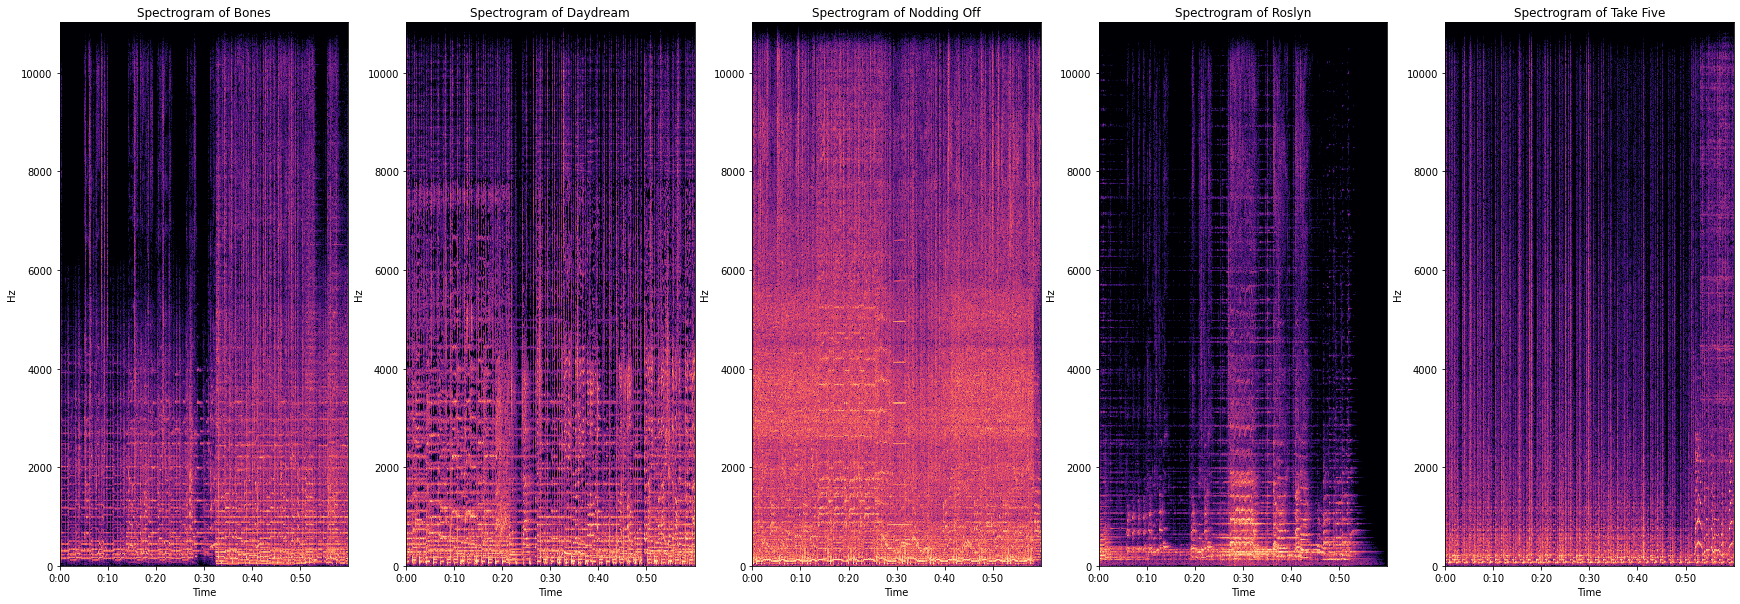

In [171]:
DBbones = to_decibles(bones)
DBdaydream = to_decibles(daydream)
DBnoddingoff = to_decibles(noddingoff)
DBroslyn = to_decibles(roslyn)
DBtakefive = to_decibles(takefive)

fig, ax = plt.subplots(1, 5, figsize = (30,10))

librosa.display.specshow(DBbones, sr=sr, x_axis='time', y_axis='linear', ax=ax[0])
ax[0].set(title = 'Spectrogram of Bones')

librosa.display.specshow(DBdaydream, sr=sr, x_axis='time', y_axis='linear', ax=ax[1])
ax[1].set(title = 'Spectrogram of Daydream')

librosa.display.specshow(DBnoddingoff, sr=sr, x_axis='time', y_axis='linear', ax=ax[2])
ax[2].set(title = 'Spectrogram of Nodding Off')

librosa.display.specshow(DBroslyn, sr=sr, x_axis='time', y_axis='linear', ax=ax[3])
ax[3].set(title = 'Spectrogram of Roslyn')

librosa.display.specshow(DBtakefive, sr=sr, x_axis='time', y_axis='linear', ax=ax[4])
ax[4].set(title = 'Spectrogram of Take Five')

plt.show()

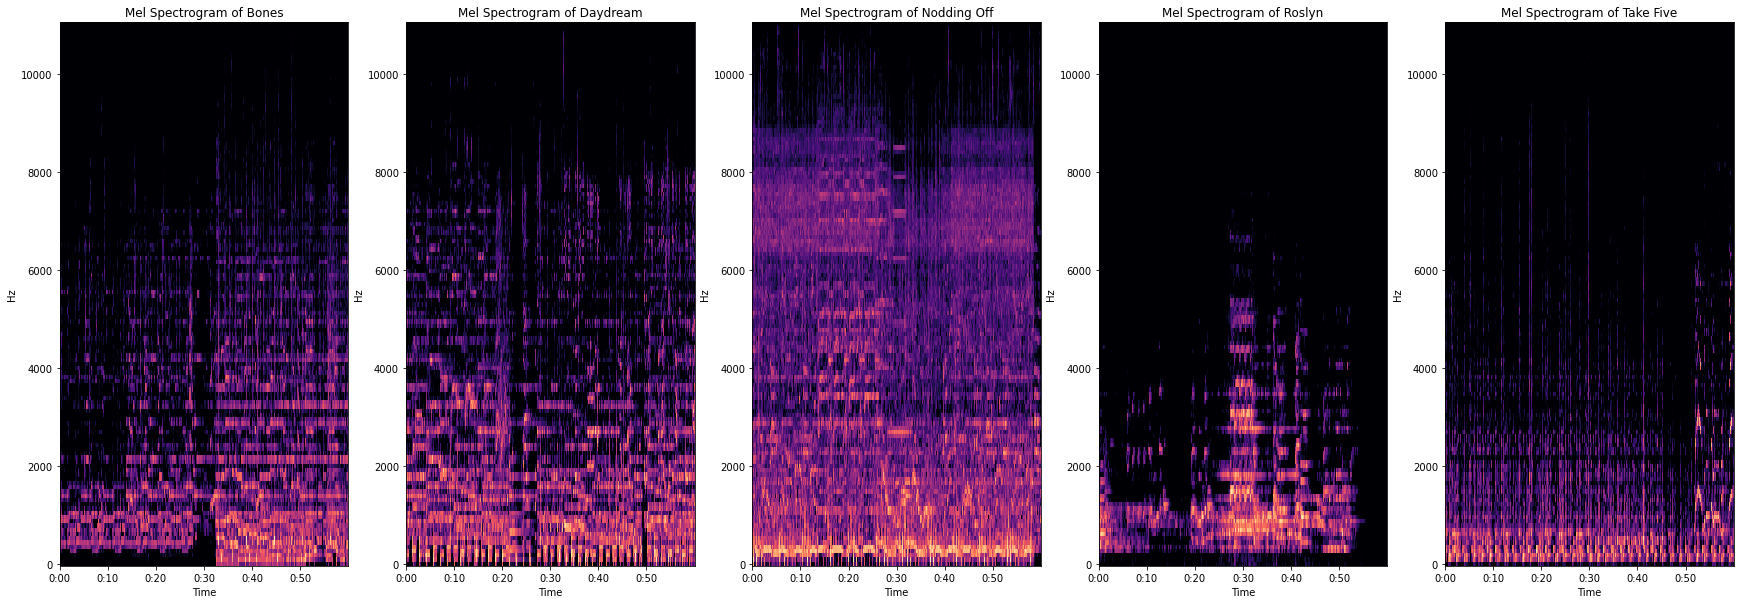

In [172]:
bonesSpec = librosa.feature.melspectrogram(y=bones)
daydreamSpec = librosa.feature.melspectrogram(y=daydream)
noddingoffSpec = librosa.feature.melspectrogram(y=noddingoff)
roslynSpec = librosa.feature.melspectrogram(y=roslyn)
takefiveSpec = librosa.feature.melspectrogram(y=takefive)

bonesSpec = librosa.amplitude_to_db(bonesSpec)
daydreamSpec = librosa.amplitude_to_db(daydreamSpec)
noddingoffSpec = librosa.amplitude_to_db(noddingoffSpec)
roslynSpec = librosa.amplitude_to_db(roslynSpec)
takefiveSpec = librosa.amplitude_to_db(takefiveSpec)

fig, ax = plt.subplots(1,5, figsize = (30,10))

librosa.display.specshow(bonesSpec, sr=sr, x_axis='time', y_axis='linear', ax=ax[0], cmap='magma')
ax[0].set(title = 'Mel Spectrogram of Bones')

librosa.display.specshow(daydreamSpec, sr=sr, x_axis='time', y_axis='linear', ax=ax[1], cmap='magma')
ax[1].set(title = 'Mel Spectrogram of Daydream')

librosa.display.specshow(noddingoffSpec, sr=sr, x_axis='time', y_axis='linear', ax=ax[2], cmap='magma')
ax[2].set(title = 'Mel Spectrogram of Nodding Off')

librosa.display.specshow(roslynSpec, sr=sr, x_axis='time', y_axis='linear', ax=ax[3], cmap='magma')
ax[3].set(title = 'Mel Spectrogram of Roslyn')

librosa.display.specshow(takefiveSpec, sr=sr, x_axis='time', y_axis='linear', ax=ax[4], cmap='magma')
ax[4].set(title = 'Mel Spectrogram of Take Five')

plt.show()

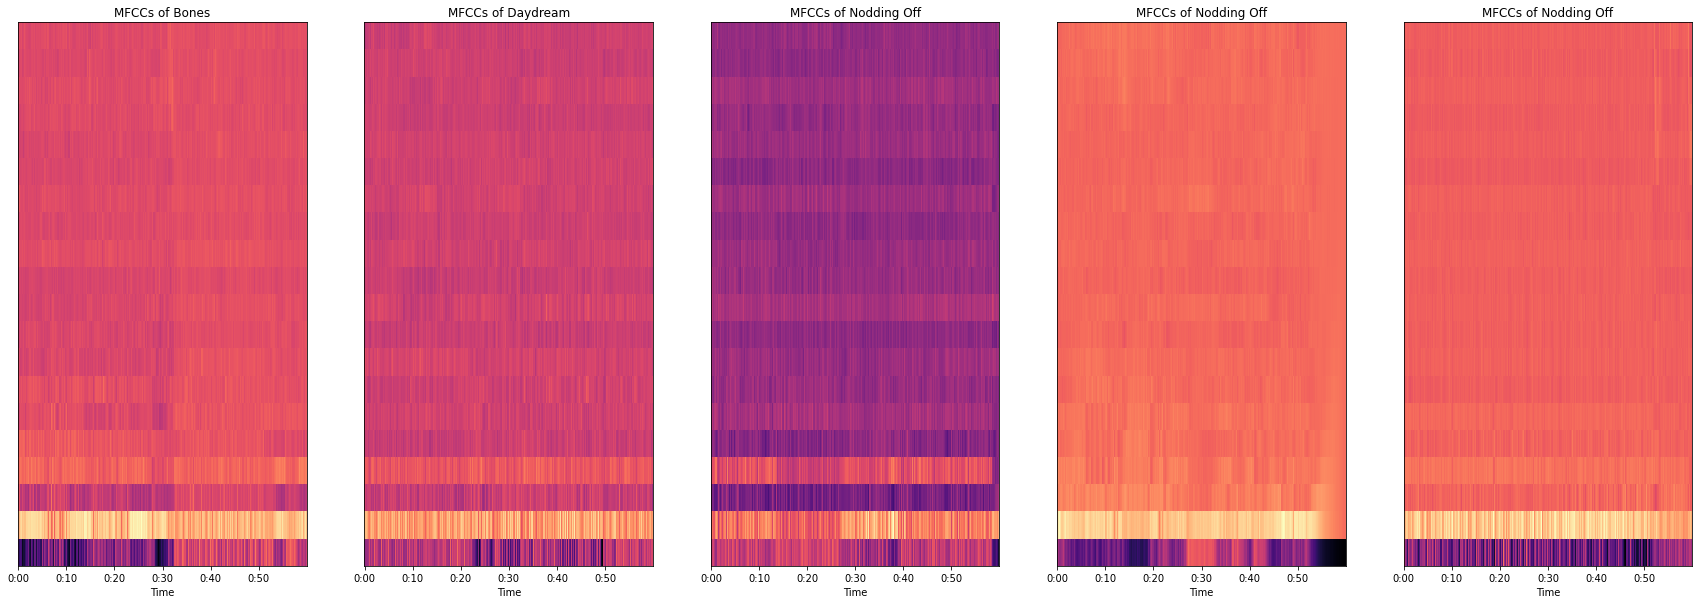

In [173]:
bonesMFCC = librosa.feature.mfcc(y=bones)
daydreamMFCC = librosa.feature.mfcc(y=daydream)
noddingoffMFCC = librosa.feature.mfcc(y=noddingoff)
roslynMFCC = librosa.feature.mfcc(y=roslyn)
takefiveMFCC = librosa.feature.mfcc(y=takefive)

fig, ax = plt.subplots(1,5, figsize = (30,10))

i = librosa.display.specshow(bonesMFCC, x_axis='time', ax=ax[0], cmap='magma')
ax[0].set(title = 'MFCCs of Bones')

librosa.display.specshow(daydreamMFCC, x_axis='time', ax=ax[1], cmap='magma')
ax[1].set(title = 'MFCCs of Daydream')

librosa.display.specshow(noddingoffMFCC,x_axis='time', ax=ax[2], cmap='magma')
ax[2].set(title = 'MFCCs of Nodding Off')

librosa.display.specshow(roslynMFCC,x_axis='time', ax=ax[3], cmap='magma')
ax[3].set(title = 'MFCCs of Nodding Off')

librosa.display.specshow(takefiveMFCC,x_axis='time', ax=ax[4], cmap='magma')
ax[4].set(title = 'MFCCs of Nodding Off')

plt.show()

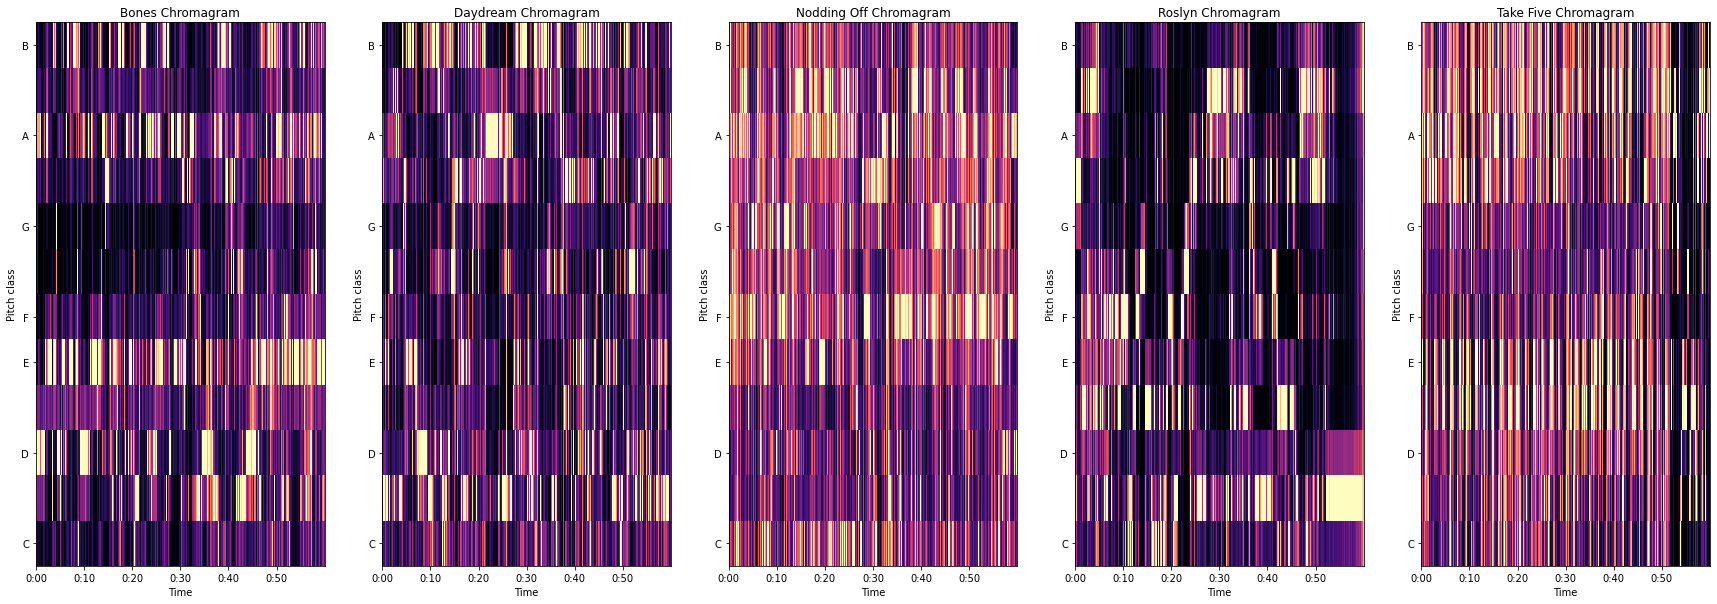

In [178]:
bones_chroma = librosa.feature.chroma_stft(y=bones, sr=sr)
daydream_chroma = librosa.feature.chroma_stft(y=daydream, sr=sr)
noddingoff_chroma = librosa.feature.chroma_stft(y=noddingoff, sr=sr)
roslyn_chroma = librosa.feature.chroma_stft(y=roslyn, sr=sr)
takefive_chroma = librosa.feature.chroma_stft(y=takefive, sr=sr)

# Visualize the STFT chromagrams
fig, ax = plt.subplots(1,5, figsize=(30,10))

librosa.display.specshow(bones_chroma, y_axis = 'chroma', x_axis='time', ax=ax[0])
ax[0].set(title = 'Bones Chromagram')

librosa.display.specshow(daydream_chroma, y_axis = 'chroma', x_axis='time', ax=ax[1])
ax[1].set(title = 'Daydream Chromagram')

librosa.display.specshow(noddingoff_chroma, y_axis = 'chroma', x_axis='time', ax=ax[2])
ax[2].set(title = 'Nodding Off Chromagram')

librosa.display.specshow(roslyn_chroma, y_axis = 'chroma', x_axis='time', ax=ax[3])
ax[3].set(title = 'Roslyn Chromagram')

librosa.display.specshow(takefive_chroma, y_axis = 'chroma', x_axis='time', ax=ax[4])
ax[4].set(title = 'Take Five Chromagram')

plt.show()